2025-08-08 10:47:05.308867: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-08 10:47:05.308900: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-08 10:47:05.310283: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-08 10:47:05.315769: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


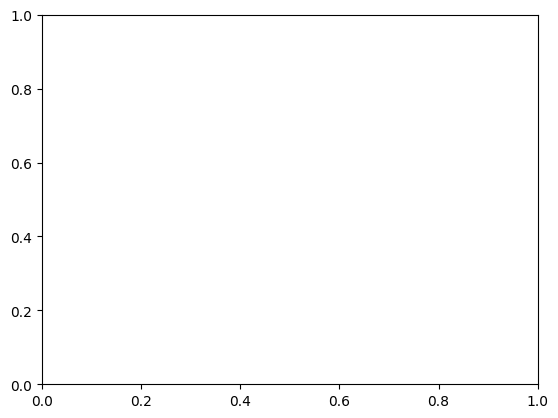

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import seaborn as sns

from skspatial.objects import Line, Plane
from skspatial.plotting import plot_3d


from skspatial.objects import Line, Cylinder, Point, Points
from skspatial.plotting import plot_3d

import phasespace

import tensorflow

import bisect
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

import seaborn as sns

import numpy as np
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal

import numpy as np
from scipy.interpolate import griddata
from scipy.integrate import quad, trapezoid
from scipy.interpolate import CubicSpline

import matplotlib.pylab as plt
from scipy import stats
from matplotlib import cm
from matplotlib.ticker import LinearLocator

from scipy.interpolate import LinearNDInterpolator




import dm_generation_tools as dgt

import time

####################################
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")


import pickle

In [2]:
print(phasespace.__version__)

print(tensorflow.__version__)

1.10.3
2.16.2


In [25]:
#MASS_A=[.250,1,5]
#DM_MASSES=[10,100,1000]

#MASS_A=[1]
#DM_MASSES=[1000]

# High mass states
MASS_A = [.220,0.5, 0.75, 1]
DM_MASSES = [1000,10000,100000]#, 1000000]

#nevents = 10000
# For testing
#nevents = 100
nevents = 1000

start_time = time.time()
df_decays = dgt.generate_dm_decays(MASS_A=MASS_A, DM_MASSES=DM_MASSES, nevents_to_generate=nevents)
print(f"Time to generate {time.time() - start_time:.2} seconds")

0.22 1000
Generating 1000 decays
Generated the decays
Pulling out the values from the decays and filling our dataframe...
Pulled out the values from the decays and filled our dataframe...
0.22 10000
Generating 1000 decays
Generated the decays
Pulling out the values from the decays and filling our dataframe...
Pulled out the values from the decays and filled our dataframe...
0.22 100000
Generating 1000 decays
Generated the decays
Pulling out the values from the decays and filling our dataframe...
Pulled out the values from the decays and filled our dataframe...
0.5 1000
Generating 1000 decays
Generated the decays
Pulling out the values from the decays and filling our dataframe...
Pulled out the values from the decays and filled our dataframe...
0.5 10000
Generating 1000 decays
Generated the decays
Pulling out the values from the decays and filling our dataframe...
Pulled out the values from the decays and filled our dataframe...
0.5 100000
Generating 1000 decays
Generated the decays
Pul

In [26]:
df_decays

,M_DM,M_A,px_mu1,py_mu1,pz_mu1,e_mu1,px_mu2,py_mu2,pz_mu2,e_mu2,pmag1,theta1,phi1,pmag2,theta2,phi2,opening angle
0,1000.0,0.22,0.010242,0.005329,362.235436,362.235451,-0.010242,-0.005329,637.764565,637.764574,362.235436,0.001826,0.000015,637.764565,0.001037,-0.000008,0.002863
1,1000.0,0.22,-0.013706,0.021311,592.027150,592.027160,0.013706,-0.021311,407.972851,407.972865,592.027150,0.002452,0.000036,407.972852,0.003558,-0.000052,0.006011
2,1000.0,0.22,0.008704,-0.021558,602.788008,602.788018,-0.008704,0.021558,397.211992,397.212007,602.788009,0.002210,-0.000036,397.211993,0.003354,0.000054,0.005563
3,1000.0,0.22,-0.005993,0.025065,589.502122,589.502132,0.005993,-0.025065,410.497879,410.497893,589.502122,0.002505,0.000043,410.497880,0.003597,-0.000061,0.006102
4,1000.0,0.22,-0.024131,0.020107,536.734536,536.734547,0.024131,-0.020107,463.265465,463.265478,536.734537,0.003353,0.000037,463.265466,0.003885,-0.000043,0.007238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,100000.0,1.00,0.232114,0.409815,36913.101873,36913.101876,-0.232114,-0.409815,63086.909640,63086.909642,36913.101876,0.000731,0.000011,63086.909641,0.000428,-0.000006,0.001159
11996,100000.0,1.00,-0.204208,-0.382698,72537.293771,72537.293772,0.204208,0.382698,27462.717742,27462.717745,72537.293772,0.000343,-0.000005,27462.717745,0.000905,0.000014,0.001248
11997,100000.0,1.00,0.294104,-0.386892,55261.990437,55261.990439,-0.294104,0.386892,44738.021076,44738.021079,55261.990439,0.000504,-0.000007,44738.021079,0.000622,0.000009,0.001126
11998,100000.0,1.00,-0.149983,-0.363110,20912.580872,20912.580876,0.149983,0.363110,79087.430640,79087.430642,20912.580876,0.001076,-0.000017,79087.430641,0.000285,0.000005,0.001361


Text(0.5, 0, 'opening angle (radians)')

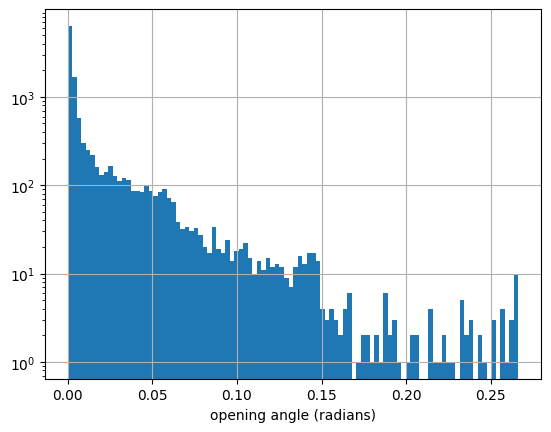

In [27]:
# Check that these are going straight up

#df_decays['phi2'].hist(bins=100)
df_decays['theta2'].hist(bins=100)
plt.yscale('log')
plt.xlabel('opening angle (radians)')

#df_decays['pz_mu1'].hist(bins=100)

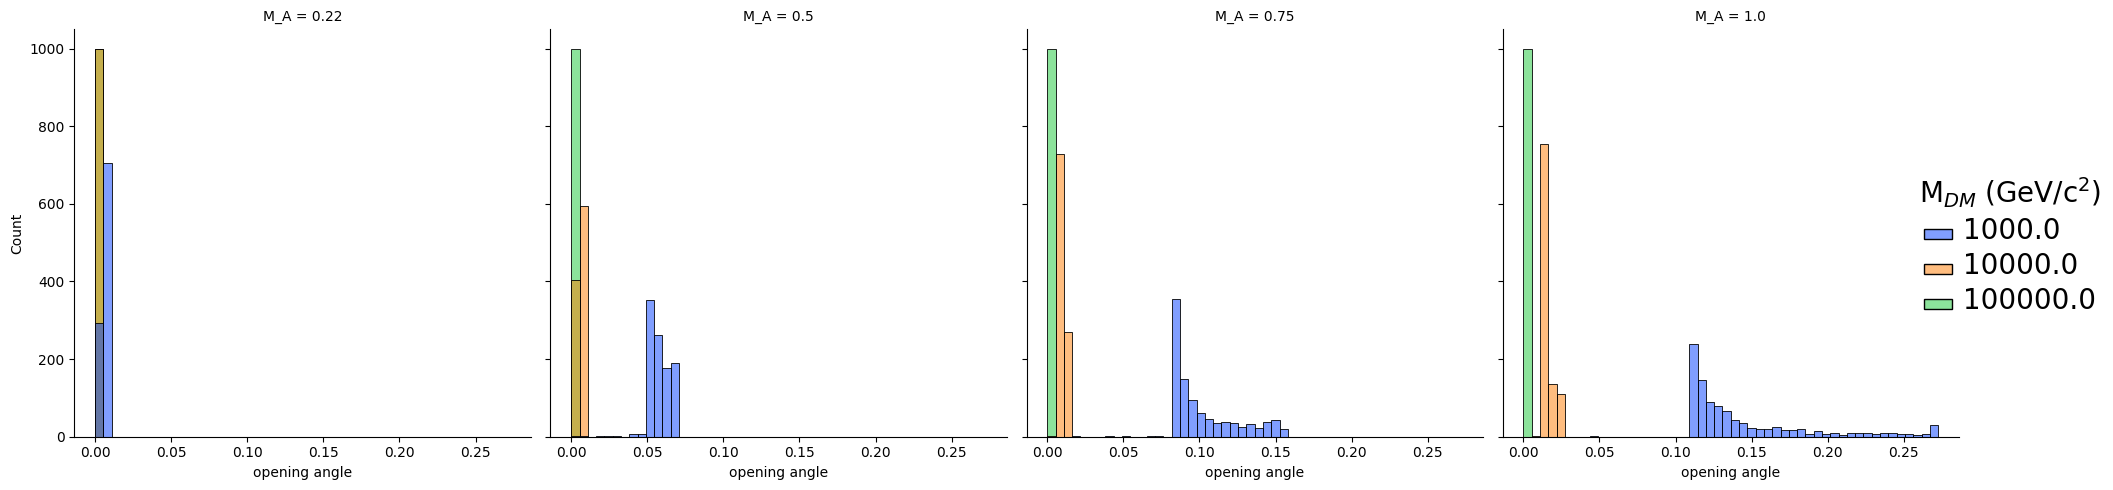

In [28]:
palette = sns.color_palette("bright",3)

g = sns.displot(df_decays, x='opening angle', hue='M_DM', col='M_A', bins=50, palette=palette)

# Legend texts
g.legend.get_title().set_fontsize(20)
g.legend.set_title(r"M$_{DM}$ (GeV/c$^2$)")
for text in g.legend.texts:
    text.set_fontsize(20)

[  1000.  10000. 100000.]


Text(0.5, 1.0, 'M$_{DM}$ = 100000.0 GeV')

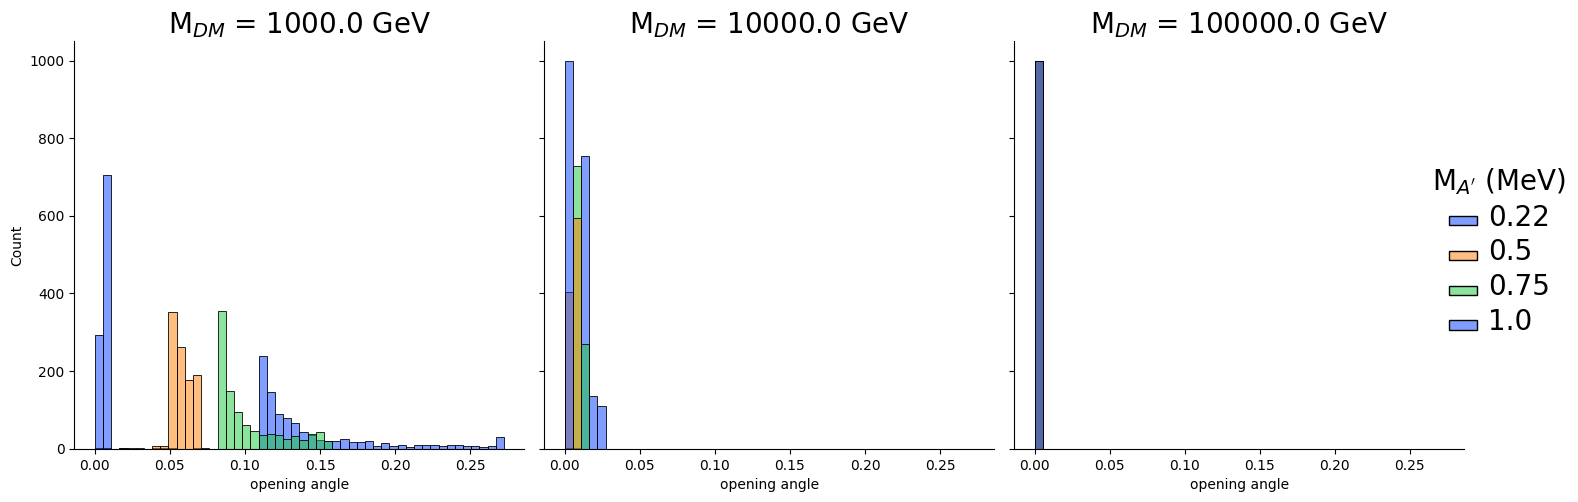

In [29]:
g = sns.displot(df_decays, x='opening angle', col='M_DM', hue='M_A', bins=50, palette=palette)

# Legend texts
g.legend.get_title().set_fontsize(20)
g.legend.set_title(r"M$_{A'}$ (MeV)")
for text in g.legend.texts:
    text.set_fontsize(20)

dms = df_decays['M_DM'].unique()
print(dms)

DM_text = '{DM}'

axes = g.axes.flat
axes[0].set_title(f'M$_{DM_text}$ = {dms[0]} GeV', fontsize=20)
axes[1].set_title(f'M$_{DM_text}$ = {dms[1]} GeV', fontsize=20)
axes[2].set_title(f'M$_{DM_text}$ = {dms[2]} GeV', fontsize=20)
#axes[3].set_title(f'M$_{DM_text}$ = {dms[3]} GeV', fontsize=20)

In [30]:
np.rad2deg(0.1)

5.729577951308233

Text(0.5, 1.0, 'M$_{DM}$ = 100 TeV')

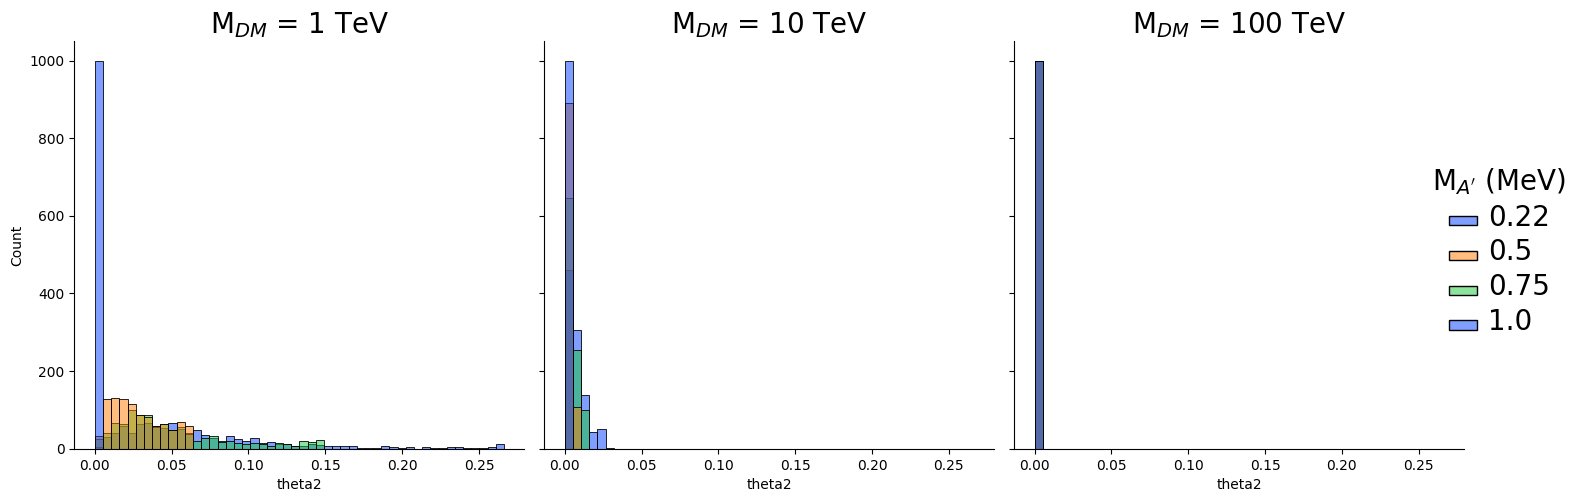

In [31]:
g = sns.displot(df_decays, x='theta2', col='M_DM', hue='M_A', bins=50, palette=palette, fill=True)#, height=5, aspect=1.5, fill=True)

#g.set(ylim=(0,12000))

# Legend texts
g.legend.get_title().set_fontsize(20)
g.legend.set_title(r"M$_{A'}$ (MeV)")
for text in g.legend.texts:
    text.set_fontsize(20)

axes = g.axes.flat
axes[0].set_title(r'M$_{DM}$ = 1 TeV', fontsize=20)
axes[1].set_title(r'M$_{DM}$ = 10 TeV', fontsize=20)
axes[2].set_title(r'M$_{DM}$ = 100 TeV', fontsize=20)

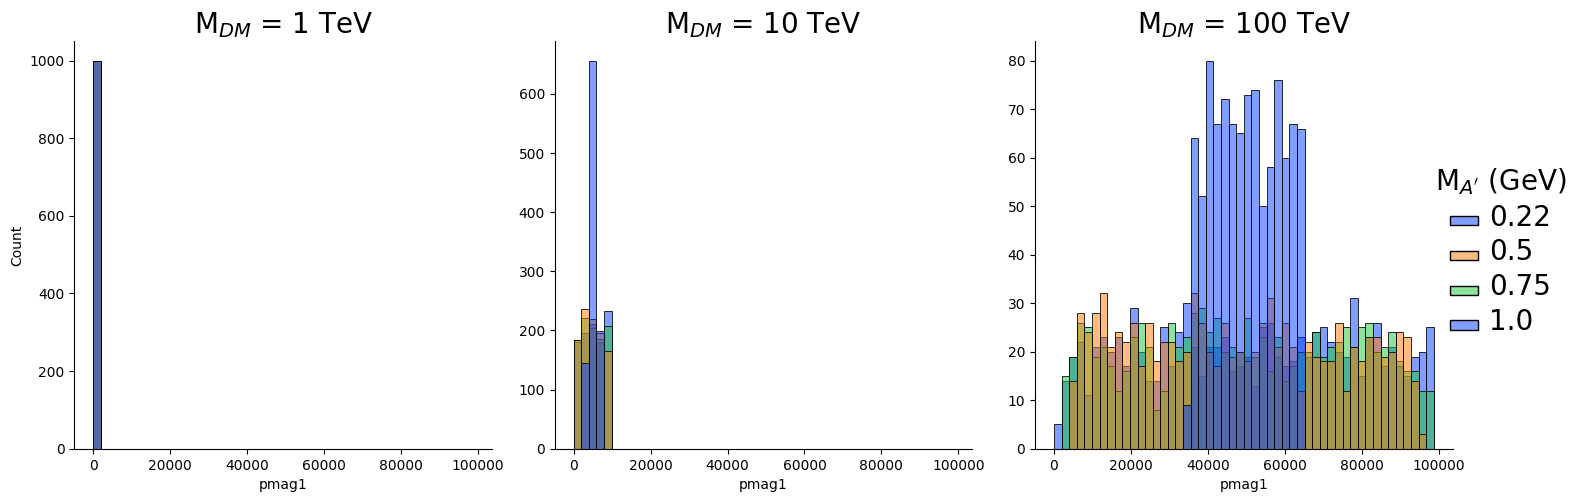

In [32]:
g = sns.displot(df_decays, x='pmag1', col='M_DM', hue='M_A', bins=50, palette=palette, facet_kws=dict(sharey=False, sharex=False))

for ax in g.axes.flat:
  ax.ticklabel_format(axis="x", style="plain", scilimits=(0,0))

axes = g.axes.flat
axes[0].set_title(r'M$_{DM}$ = 1 TeV', fontsize=20)
axes[1].set_title(r'M$_{DM}$ = 10 TeV', fontsize=20)
axes[2].set_title(r'M$_{DM}$ = 100 TeV', fontsize=20)

# Legend texts
g.legend.get_title().set_fontsize(20)
g.legend.set_title(r"M$_{A'}$ (GeV)")
for text in g.legend.texts:
    text.set_fontsize(20)

In [33]:
df_decays

,M_DM,M_A,px_mu1,py_mu1,pz_mu1,e_mu1,px_mu2,py_mu2,pz_mu2,e_mu2,pmag1,theta1,phi1,pmag2,theta2,phi2,opening angle
0,1000.0,0.22,0.010242,0.005329,362.235436,362.235451,-0.010242,-0.005329,637.764565,637.764574,362.235436,0.001826,0.000015,637.764565,0.001037,-0.000008,0.002863
1,1000.0,0.22,-0.013706,0.021311,592.027150,592.027160,0.013706,-0.021311,407.972851,407.972865,592.027150,0.002452,0.000036,407.972852,0.003558,-0.000052,0.006011
2,1000.0,0.22,0.008704,-0.021558,602.788008,602.788018,-0.008704,0.021558,397.211992,397.212007,602.788009,0.002210,-0.000036,397.211993,0.003354,0.000054,0.005563
3,1000.0,0.22,-0.005993,0.025065,589.502122,589.502132,0.005993,-0.025065,410.497879,410.497893,589.502122,0.002505,0.000043,410.497880,0.003597,-0.000061,0.006102
4,1000.0,0.22,-0.024131,0.020107,536.734536,536.734547,0.024131,-0.020107,463.265465,463.265478,536.734537,0.003353,0.000037,463.265466,0.003885,-0.000043,0.007238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,100000.0,1.00,0.232114,0.409815,36913.101873,36913.101876,-0.232114,-0.409815,63086.909640,63086.909642,36913.101876,0.000731,0.000011,63086.909641,0.000428,-0.000006,0.001159
11996,100000.0,1.00,-0.204208,-0.382698,72537.293771,72537.293772,0.204208,0.382698,27462.717742,27462.717745,72537.293772,0.000343,-0.000005,27462.717745,0.000905,0.000014,0.001248
11997,100000.0,1.00,0.294104,-0.386892,55261.990437,55261.990439,-0.294104,0.386892,44738.021076,44738.021079,55261.990439,0.000504,-0.000007,44738.021079,0.000622,0.000009,0.001126
11998,100000.0,1.00,-0.149983,-0.363110,20912.580872,20912.580876,0.149983,0.363110,79087.430640,79087.430642,20912.580876,0.001076,-0.000017,79087.430641,0.000285,0.000005,0.001361


# Which of these hit CMS?

In [34]:
'''
eloss_data = None

# This file comes from the tests_of_functions notebook in the directory
# above this one

with open('energies_and_distances_file.pkl', 'rb') as f:
    # Load the pickled object from the file
    eloss_data = pickle.load(f)

eloss_interp = eloss_data['interp']

eloss_interp
#eloss_data
'''

"\neloss_data = None\n\n# This file comes from the tests_of_functions notebook in the directory\n# above this one\n\nwith open('energies_and_distances_file.pkl', 'rb') as f:\n    # Load the pickled object from the file\n    eloss_data = pickle.load(f)\n\neloss_interp = eloss_data['interp']\n\neloss_interp\n#eloss_data\n"

In [35]:
infilename_for_eloss = 'muons_summary_from_GEANT4_simulations.parquet'
df_eloss = pd.read_parquet(infilename_for_eloss)
df_eloss

,z,r,e_initial,e
0,-0.971791,0.000000,100.0,0.012300
1,1.463520,0.002955,100.0,2.513300
2,3.790580,0.005985,100.0,4.057300
3,6.452090,0.012541,100.0,6.774900
4,8.743030,0.020711,100.0,8.799200
...,...,...,...,...
26082484,4417.430000,1.622687,100000.0,99994.285910
26082485,4419.320000,1.687053,100000.0,99995.230780
26082486,4421.560000,1.776349,100000.0,99996.524070
26082487,4424.510000,1.993304,100000.0,99998.093030


In [66]:
def find_neighbors(sorted_list, x):
    """
    Given sorted_list (ascending) and a value x,
    return (low, high) where:
      - low  = the largest element <= x (or None if x < sorted_list[0])
      - high = the smallest element >= x (or None if x > sorted_list[-1])
    """
    idx = bisect.bisect_left(sorted_list, x)
    # idx is the insertion point to keep the list sorted.
    if idx == 0:
        # x is <= first element
        return None, sorted_list[0]
    elif idx == len(sorted_list):
        # x is greater than all elements
        return sorted_list[-1], None
    else:
        # sorted_list[idx-1] < x <= sorted_list[idx]
        return sorted_list[idx-1], sorted_list[idx]

#####################################################################################

def energy_after_traveling_distance(e_initials, zvals, eivals, efvals, E_muon, distance, make_plots=False, ngendata=1, verbose=False):
    
    start = time.time()

    # My own 
    d = distance
    dwidth = 0.01 * d

    #print(e_initials)
    #E_muon = 45040
    elo,ehi = find_neighbors(e_initials, E_muon)
    delta_e = ehi - elo

    if verbose:
        print(f"In function: time to run A: {time.time() - start:.2f} seconds")

    #print(elo, ehi, delta_e)
    
    frequencies = []
    eis = []
    efs = []
    
    #plt.figure(figsize=(16,8))
    
    # First find the ranges
    elo_min = [1e99, 1e99]
    ehi_max = [-1e99, -1e99]
    
    #filter_distance = (zvals > d-dwidth) & (zvals < d+dwidth)
    
    for i,Ei in enumerate([elo,ehi]):
        
        filter = (eivals==Ei)# & filter_distance
        #filter = filter & 
        
        #vals = Ei - efvals[filter]
        vals = efvals[filter]
    
        if len(vals) < 10:
            if verbose:
                print("NO DATA TO WORK WITH")
            return -1*np.ones(ngendata,dtype=int)
            #continue
            
        test_min = min(vals)
        test_max = max(vals)
        if test_min <= elo_min[i]:
            elo_min[i] = test_min
        if test_max >= ehi_max[i]:
            ehi_max[i] = test_max
    if verbose:
        print(f"In function: time to run B: {time.time() - start:.2f} seconds")
    
    for i,Ei in enumerate([elo,ehi]):
        #Ei = 30000
        
        filter = (eivals==Ei)# & filter_distance
        #filter = filter & (zvals > d-dwidth) & (zvals < d+dwidth)
        
        #vals = Ei - efvals[filter]
        vals = efvals[filter]

        if make_plots:
            plt.subplot(2,2,1)
            plt.hist(vals, bins=100, range=(elo_min[i], ehi_max[i]),label=f'{Ei}', alpha=0.5);
            plt.legend()

        if len(vals) < 10:
            if verbose:
                print("NO DATA TO WORK WITH")
            return -1*np.ones(ngendata,dtype=int)
            #continue

        kde = stats.gaussian_kde(vals)
        xpts = np.linspace(elo_min[i], ehi_max[i], 100)
        ypts = kde(xpts)
        #frequencies = kde.evaluate(xpts)
    
        # Shift up the lower one
        #if i==0:
        #    xpts += delta_e
    
        # Normalize the xpts
        e_range = ehi_max[i] - elo_min[i]
        xpts -= elo_min[i]
        xpts /= e_range

        if make_plots:
            plt.subplot(2,2,2)
            plt.plot(xpts,ypts, label=f'{Ei}')
            #plt.xlim(0,1.1*ehi)
            plt.legend()
    
        efs += xpts.tolist()
        eis += (Ei * np.ones_like(xpts)).tolist()
        frequencies += ypts.tolist()

    if verbose:
        print(f"In function: time to run C: {time.time() - start:.2f} seconds")

    data = np.array([eis, efs])
    #print(data.shape, len(frequencies))
    interp = LinearNDInterpolator(data.T, frequencies )

    if verbose:
        print(f"In function: time to run D: {time.time() - start:.2f} seconds")

    #xpts_temp = np.linspace(elo_min,ehi_max,100)
    xpts_temp = np.linspace(0,1,100)
    
    ypts_temp = interp(E_muon,xpts_temp);
    
    filter = ypts_temp==ypts_temp
    
    # Cut out the nans since some of the points are out of range
    xpts = xpts_temp[filter]
    ypts = ypts_temp[filter]
    
    # Shift the xpoints down
    #xpts -= (ehi - E_muon)

    if make_plots:
        #plt.figure()
        plt.plot(xpts,ypts, label=f'{E_muon}')
        plt.legend()
    
    # Sample points
    dx = xpts[1] - xpts[0]
    #print(dx)
    #print(ypts)
    
    cdf = np.cumsum(ypts)*dx
    #print(cdf)
    
    cdf /= cdf[-1]
    
    #print(cdf)
    if verbose:
        print(f"In function: time to run E: {time.time() - start:.2f} seconds")

    if make_plots:
        plt.figure(figsize=(12,4))
        plt.subplot(1,2,1)
        plt.plot(xpts, cdf, label='CDF')
        #print(cdf)
        plt.legend()
    
    #filter = (xpts>=elo_min) & (xpts<=ehi_max)
    #print(cdf)
    #print(cdf[filter])
    
    spl = CubicSpline(xpts, cdf)

    if verbose:
        print(f"In function: time to run F: {time.time() - start:.2f} seconds")

    gendata = []
    #ngendata = 5000
    nfail = 0
    
    # Scaling
    frac_of_diff = (E_muon - elo) / (ehi - elo)
    #print(f"{frac_of_diff = }")
    e_range_0 = ehi_max[0] - elo_min[0]
    e_range_1 = ehi_max[1] - elo_min[1]
    #print(f"{e_range_0 = }")
    #print(f"{e_range_1 = }")
    
    e_muon_range = e_range_0 + ((e_range_1 - e_range_0)*frac_of_diff)
    e_muon_lo   = elo_min[0] + ((elo_min[1] - elo_min[0])*frac_of_diff)
    #print(f"{e_muon_range = }")
    #print(f"{e_muon_lo = }")
    
    #ngendata = 1
    icount = 0
    
    while icount < ngendata:
        #print(icount, ngendata)
        u = np.random.random() # Generates a float between 0.0 and 1.0
    
        #print(f"In function: time to run G - a: {time.time() - start:.2f} seconds")

        ynew = spl.solve(u)
        #print(f"In function: time to run G - b: {time.time() - start:.2f} seconds")
        
        #xnew = max(ynew)
        #filter = (ynew>0) & (ynew<ehi_max)
        filter = (ynew>0) & (ynew<1)
    
        xnew = ynew[filter]
        if len(xnew) == 1:
            good_val = xnew[0]
            good_val *= e_muon_range
            good_val += e_muon_lo
        else:
            print(u, ynew, xnew)
            nfail += 1
            continue
        #print(good_val)
        #plt.subplot(1,3,2)
        #print(xnew,u)
        #plt.plot(xnew, u, 'ro', markersize=5)
        
        gendata.append(good_val)
        icount += 1

    if make_plots:
        plt.subplot(1,2,2)
        plt.hist(gendata, bins=200)#, range=(0,1));
    
    if verbose:
        print(f"In function: time to run G: {time.time() - start:.2f} seconds")
        print(f'{nfail = }')

    return gendata
    

In [67]:
e_initials = df_eloss['e_initial'].unique()
zvals = df_eloss['z'].values
eivals = df_eloss['e_initial']
efvals = df_eloss['e']
    
start = time.time()
distance = 1000
distance_width = 0.01 * distance
E_muon = 45000

elo,ehi = find_neighbors(e_initials, E_muon)
filter = (eivals==elo) | (eivals==ehi)
filter = filter & (zvals>distance - distance_width) & (zvals<distance+distance_width)

print("Here")

delta_e = energy_after_traveling_distance(e_initials, zvals[filter], eivals[filter], efvals[filter], E_muon=E_muon, distance=distance, make_plots=False, ngendata=1)
print(f"Time to run: {time.time() - start:.2f} seconds")
de = delta_e[0]
e_final = E_muon - de
print(f"{E_muon:.2f}  {de:.2f}   {e_final:.2f}")


Here
Time to run: 0.11 seconds
45000.00  41771.20   3228.80


In [68]:
'''
# Given some energy (first arg) and some distance (second arg), what is the final energy?
print(eloss_interp(1000,100)[0][0])
print(eloss_interp(1000000,1000000)[0][0])

e_i = 100
e_f = eloss_interp(e_i,1)[0][0]
print(f"e_i: {e_i:.2f}   e_f: {e_f:.2f}   de: {e_i-e_f:.2f}")
''';


In [69]:
'''
dx = 0.01

m_muon = 0.105

#momenta = np.arange(0.1,10,0.1)
momenta = np.arange(1,1000,1)

energies = np.sqrt(momenta**2 + m_muon**2)

#print(energies)
# How much energy loss after going 1 meter
new_energies = eloss_interp(energies, dx)

#print(new_energies.T[0])

de = energies - new_energies.T[0]
#plt.plot(energies, de/dx)
# Convert GeV to MeV by multiplying by 1000, maybe?
plt.plot(momenta, de)
''';

In [70]:
df_decays.columns

Index(['M_DM', 'M_A', 'px_mu1', 'py_mu1', 'pz_mu1', 'e_mu1', 'px_mu2',
       'py_mu2', 'pz_mu2', 'e_mu2', 'pmag1', 'theta1', 'phi1', 'pmag2',
       'theta2', 'phi2', 'opening angle', 'x0', 'y0', 'z0', 'distance_to_cms'],
      dtype='object')

In [71]:
# generate_origin

def fill_df_with_origins_distances(df, xranges, yranges, zranges, cms_origin=[0, 0, 0]):

    xlo,xhi = xranges
    ylo,yhi = yranges
    zlo,zhi = zranges

    xwidth = xhi-xlo
    ywidth = yhi-ylo
    zwidth = zhi-zlo
    #print(zwidth)
        
    #origin = [xhi-xwidth*np.random.random(), yhi-ywidth*np.random.random(), -zhi-zwidth*np.random.random()]
    
    #origin
    
    npts = len(df)
    
    x = xhi-xwidth*np.random.random(npts)
    y = yhi-ywidth*np.random.random(npts)
    z = zlo+zwidth*np.random.random(npts)
    # Trying something
    # Generate between -1 and 0
    #z = -1*np.random.random(npts)
    #z *= df['M_DM'].values # Multiplying by the mass is an analog for the distance the muon travels
    
    df['x0'] = x
    df['y0'] = y
    df['z0'] = z

    dx = x-cms_origin[0]
    dy = y-cms_origin[1]
    dz = z-cms_origin[2]

    dist = np.sqrt(dx*dx + dy*dy + dz*dz)

    df['distance_to_cms'] = dist

limits = 20
#xlo, xhi = -limits,limits
#ylo, yhi = -limits,limits
#zlo, zhi = -limits, -1
xlo, xhi = -limits,limits
ylo, yhi = -limits,limits
zlo, zhi = -6000, -1

############# NEED TO TAKE THIS SIZE INTO ACCOUNT FOR THE EFFICIENCIES

cms_origin=[0, 0, 0]
fill_df_with_origins_distances(df_decays, [xlo,xhi], [ylo,yhi], [zlo,zhi], cms_origin=cms_origin)


filter = df_decays['M_DM'] < 200000

df_decays[filter]


,M_DM,M_A,px_mu1,py_mu1,pz_mu1,e_mu1,px_mu2,py_mu2,pz_mu2,e_mu2,...,theta1,phi1,pmag2,theta2,phi2,opening angle,x0,y0,z0,distance_to_cms
0,1000.0,0.22,0.010242,0.005329,362.235436,362.235451,-0.010242,-0.005329,637.764565,637.764574,...,0.001826,0.000015,637.764565,0.001037,-0.000008,0.002863,-7.513750,-3.205327,-1720.542537,1720.561930
1,1000.0,0.22,-0.013706,0.021311,592.027150,592.027160,0.013706,-0.021311,407.972851,407.972865,...,0.002452,0.000036,407.972852,0.003558,-0.000052,0.006011,-15.517320,-12.901057,-4475.004220,4475.049720
2,1000.0,0.22,0.008704,-0.021558,602.788008,602.788018,-0.008704,0.021558,397.211992,397.212007,...,0.002210,-0.000036,397.211993,0.003354,0.000054,0.005563,-15.023069,9.070063,-468.145843,468.474640
3,1000.0,0.22,-0.005993,0.025065,589.502122,589.502132,0.005993,-0.025065,410.497879,410.497893,...,0.002505,0.000043,410.497880,0.003597,-0.000061,0.006102,-1.886466,-8.720369,-534.881702,534.956110
4,1000.0,0.22,-0.024131,0.020107,536.734536,536.734547,0.024131,-0.020107,463.265465,463.265478,...,0.003353,0.000037,463.265466,0.003885,-0.000043,0.007238,9.852004,-7.027412,-1845.549372,1845.589048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,100000.0,1.00,0.232114,0.409815,36913.101873,36913.101876,-0.232114,-0.409815,63086.909640,63086.909642,...,0.000731,0.000011,63086.909641,0.000428,-0.000006,0.001159,-2.624618,-11.679248,-75.918190,76.856132
11996,100000.0,1.00,-0.204208,-0.382698,72537.293771,72537.293772,0.204208,0.382698,27462.717742,27462.717745,...,0.000343,-0.000005,27462.717745,0.000905,0.000014,0.001248,13.307662,8.787012,-1940.177616,1940.243152
11997,100000.0,1.00,0.294104,-0.386892,55261.990437,55261.990439,-0.294104,0.386892,44738.021076,44738.021079,...,0.000504,-0.000007,44738.021079,0.000622,0.000009,0.001126,-6.845134,-15.450308,-2772.663613,2772.715110
11998,100000.0,1.00,-0.149983,-0.363110,20912.580872,20912.580876,0.149983,0.363110,79087.430640,79087.430642,...,0.001076,-0.000017,79087.430641,0.000285,0.000005,0.001361,-8.490351,-16.459973,-3294.794317,3294.846370


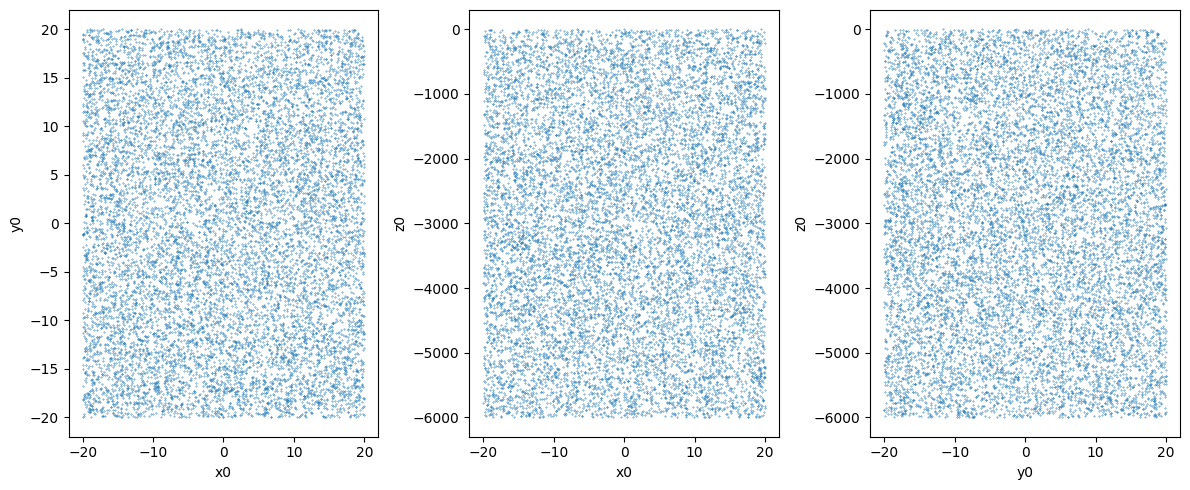

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

df_decays.plot.scatter(x='x0', y='y0', s=0.1, ax=axes[0])
df_decays.plot.scatter(x='x0', y='z0', s=0.1, ax=axes[1])
df_decays.plot.scatter(x='y0', y='z0', s=0.1, ax=axes[2])

plt.tight_layout()

In [73]:
#eloss_interp(10000000,129000)[0][0]

In [75]:
e_initials = df_eloss['e_initial'].unique()
zvals = df_eloss['z'].values
eivals = df_eloss['e_initial']
efvals = df_eloss['e']
    
#start = time.time()
#distance = 1000
#distance_width = 0.01 * distance
#E_muon = 45000

#elo,ehi = find_neighbors(e_initials, E_muon)
#filter = (eivals==elo) | (eivals==ehi)
#filter = filter & (zvals>distance - distance_width) & (zvals<distance+distance_width)


def energy_after_distance(df):#, eloss_interp):
    
    nentries = len(df)
    
    icount = 0

    very_beginning = time.time()

    for idx, energy in enumerate([df['e_mu1'], df['e_mu2']]):
        energies = energy.values

        # Assuming these are in meters
        distances = df['distance_to_cms'].values
        #distances_cm = distances*100

        # Original interpolated version
        #energy_after_traveling_distance = eloss_interp.ev(energies, distances)
        #print(energy_after_traveling_distance)
        
        # New version with radiative losses
        #energy_after_traveling_distance, rho = dgt.energy_loss(energies, particle='muon', material='rock', distance_cm=distances_cm)

        # New version using GEANT4 stuff
        energies_after_traveling_distance = []
        start = time.time()
        for distance,E_muon in zip(distances, energies):
            if icount % 100 ==0:
                print(f"{idx}   {icount} {nentries}   {time.time() - start:2f} seconds    {time.time() - very_beginning:2f} seconds")
                start = time.time()
            icount += 1
            #start = time.time()
            #distance = 1000
            distance_width = 0.01 * distance
            #E_muon = 45000
            
            elo,ehi = find_neighbors(e_initials, E_muon)
            if elo is None or ehi is None:
                energies_after_traveling_distance.append(0)
                continue
                
            filter = (eivals==elo) | (eivals==ehi)
            filter = filter & (zvals>distance - distance_width) & (zvals<distance+distance_width)
    
            delta_e = energy_after_traveling_distance(e_initials, zvals[filter], eivals[filter], efvals[filter], E_muon=E_muon, distance=distance, make_plots=False, ngendata=1)
            de = delta_e[0]
            ef = E_muon
            if de == -1:
                ef = 0
                #print(f"Did not reach detector    inital energy: {E_muon}   distance: {distance}")
            else:
                ef = E_muon - de
            energies_after_traveling_distance.append(ef)
            #print(ef)
            
        #print(energy_after_traveling_distance)
        #print(idx)
        df[f'energy_at_cms_mu{idx}'] = energies_after_traveling_distance


start = time.time()
energy_after_distance(df_decays)#, eloss_interp)
print(f"Running time: {time.time() - start} seconds")


df_decays

0   0 12000   0.000005 seconds    0.000025 seconds
0   100 12000   7.667265 seconds    7.667327 seconds
0   200 12000   7.788812 seconds    15.456176 seconds
0   300 12000   7.982229 seconds    23.438443 seconds
0.021442120047576507 [-0.04810654 -0.0060699   1.75368045] []
0   400 12000   7.748247 seconds    31.186738 seconds
0.03892106491748881 [-0.05536094 -0.00634837  1.44004922] []
0   500 12000   8.154616 seconds    39.341390 seconds
0   600 12000   7.504882 seconds    46.846310 seconds
0   700 12000   7.545521 seconds    54.391877 seconds
0   800 12000   7.560909 seconds    61.952826 seconds
0   900 12000   7.718022 seconds    69.670887 seconds
0.0531172399898201 [-0.06323747 -0.00280543  1.49516046] []
0   1000 12000   7.655620 seconds    77.326543 seconds
0   1100 12000   10.775077 seconds    88.101659 seconds
0   1200 12000   10.650254 seconds    98.751966 seconds
0.009806894764954 [-0.06573102 -0.0091803   1.46668281] []
0   1300 12000   10.355212 seconds    109.107218 second

,M_DM,M_A,px_mu1,py_mu1,pz_mu1,e_mu1,px_mu2,py_mu2,pz_mu2,e_mu2,...,pmag2,theta2,phi2,opening angle,x0,y0,z0,distance_to_cms,energy_at_cms_mu0,energy_at_cms_mu1
0,1000.0,0.22,0.010242,0.005329,362.235436,362.235451,-0.010242,-0.005329,637.764565,637.764574,...,637.764565,0.001037,-0.000008,0.002863,-7.513750,-3.205327,-1720.542537,1720.561930,0.000000,0.000000
1,1000.0,0.22,-0.013706,0.021311,592.027150,592.027160,0.013706,-0.021311,407.972851,407.972865,...,407.972852,0.003558,-0.000052,0.006011,-15.517320,-12.901057,-4475.004220,4475.049720,0.000000,0.000000
2,1000.0,0.22,0.008704,-0.021558,602.788008,602.788018,-0.008704,0.021558,397.211992,397.212007,...,397.211993,0.003354,0.000054,0.005563,-15.023069,9.070063,-468.145843,468.474640,54.130178,7.462742
3,1000.0,0.22,-0.005993,0.025065,589.502122,589.502132,0.005993,-0.025065,410.497879,410.497893,...,410.497880,0.003597,-0.000061,0.006102,-1.886466,-8.720369,-534.881702,534.956110,129.043360,10.321206
4,1000.0,0.22,-0.024131,0.020107,536.734536,536.734547,0.024131,-0.020107,463.265465,463.265478,...,463.265466,0.003885,-0.000043,0.007238,9.852004,-7.027412,-1845.549372,1845.589048,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,100000.0,1.00,0.232114,0.409815,36913.101873,36913.101876,-0.232114,-0.409815,63086.909640,63086.909642,...,63086.909641,0.000428,-0.000006,0.001159,-2.624618,-11.679248,-75.918190,76.856132,35599.338136,59790.072659
11996,100000.0,1.00,-0.204208,-0.382698,72537.293771,72537.293772,0.204208,0.382698,27462.717742,27462.717745,...,27462.717745,0.000905,0.000014,0.001248,13.307662,8.787012,-1940.177616,1940.243152,13452.875456,6257.753798
11997,100000.0,1.00,0.294104,-0.386892,55261.990437,55261.990439,-0.294104,0.386892,44738.021076,44738.021079,...,44738.021079,0.000622,0.000009,0.001126,-6.845134,-15.450308,-2772.663613,2772.715110,550.185878,972.323255
11998,100000.0,1.00,-0.149983,-0.363110,20912.580872,20912.580876,0.149983,0.363110,79087.430640,79087.430642,...,79087.430641,0.000285,0.000005,0.001361,-8.490351,-16.459973,-3294.794317,3294.846370,532.479674,1206.023505


In [76]:
def angle_between_momentum_and_spatial(df, cms_origin=[0, 0, 0]):
    x0 = df[f'x0'].values
    y0 = df[f'y0'].values
    z0 = df[f'z0'].values

    distances = df['distance_to_cms'].values
    
    for idx in ['1','2']:
        print(idx)
        px = df[f'px_mu{idx}']
        py = df[f'py_mu{idx}']
        pz = df[f'pz_mu{idx}']

        spatial_vector = [cms_origin[0] - x0, cms_origin[1] - y0, cms_origin[2] - z0]
        pvec = [px, py, pz]

        theta = dgt.opening_angle([spatial_vector,pvec])

        #print(theta)
        df['angle_pvec_spatial'] = theta

        # What is the arc len at CMS
        arc_len = theta * distances
        df['arc_len_at_cms'] = arc_len
        #energy_after_traveling_distance = eloss_interp.ev(energies, distances)
        #print(energy_after_traveling_distance)
        #df['energy_at_cms'] = energy_after_traveling_distance


angle_between_momentum_and_spatial(df_decays)

print(df_decays.columns)

df_decays

1
2
Index(['M_DM', 'M_A', 'px_mu1', 'py_mu1', 'pz_mu1', 'e_mu1', 'px_mu2',
       'py_mu2', 'pz_mu2', 'e_mu2', 'pmag1', 'theta1', 'phi1', 'pmag2',
       'theta2', 'phi2', 'opening angle', 'x0', 'y0', 'z0', 'distance_to_cms',
       'energy_at_cms_mu0', 'energy_at_cms_mu1', 'angle_pvec_spatial',
       'arc_len_at_cms'],
      dtype='object')


,M_DM,M_A,px_mu1,py_mu1,pz_mu1,e_mu1,px_mu2,py_mu2,pz_mu2,e_mu2,...,phi2,opening angle,x0,y0,z0,distance_to_cms,energy_at_cms_mu0,energy_at_cms_mu1,angle_pvec_spatial,arc_len_at_cms
0,1000.0,0.22,0.010242,0.005329,362.235436,362.235451,-0.010242,-0.005329,637.764565,637.764574,...,-0.000008,0.002863,-7.513750,-3.205327,-1720.542537,1720.561930,0.000000,0.000000,0.004766,8.199965
1,1000.0,0.22,-0.013706,0.021311,592.027150,592.027160,0.013706,-0.021311,407.972851,407.972865,...,-0.000052,0.006011,-15.517320,-12.901057,-4475.004220,4475.049720,0.000000,0.000000,0.004517,20.215594
2,1000.0,0.22,0.008704,-0.021558,602.788008,602.788018,-0.008704,0.021558,397.211992,397.212007,...,0.000054,0.005563,-15.023069,9.070063,-468.145843,468.474640,54.130178,7.462742,0.037515,17.574795
3,1000.0,0.22,-0.005993,0.025065,589.502122,589.502132,0.005993,-0.025065,410.497879,410.497893,...,-0.000061,0.006102,-1.886466,-8.720369,-534.881702,534.956110,129.043360,10.321206,0.016736,8.952785
4,1000.0,0.22,-0.024131,0.020107,536.734536,536.734547,0.024131,-0.020107,463.265465,463.265478,...,-0.000043,0.007238,9.852004,-7.027412,-1845.549372,1845.589048,0.000000,0.000000,0.006625,12.226378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,100000.0,1.00,0.232114,0.409815,36913.101873,36913.101876,-0.232114,-0.409815,63086.909640,63086.909642,...,-0.000006,0.001159,-2.624618,-11.679248,-75.918190,76.856132,35599.338136,59790.072659,0.156396,12.020008
11996,100000.0,1.00,-0.204208,-0.382698,72537.293771,72537.293772,0.204208,0.382698,27462.717742,27462.717745,...,0.000014,0.001248,13.307662,8.787012,-1940.177616,1940.243152,13452.875456,6257.753798,0.008233,15.974082
11997,100000.0,1.00,0.294104,-0.386892,55261.990437,55261.990439,-0.294104,0.386892,44738.021076,44738.021079,...,0.000009,0.001126,-6.845134,-15.450308,-2772.663613,2772.715110,550.185878,972.323255,0.006089,16.884340
11998,100000.0,1.00,-0.149983,-0.363110,20912.580872,20912.580876,0.149983,0.363110,79087.430640,79087.430642,...,0.000005,0.001361,-8.490351,-16.459973,-3294.794317,3294.846370,532.479674,1206.023505,0.005616,18.504501


In [87]:
outfilename = 'DM_dark_photon_decays_and_muon_distributions_for_CMS_detections_DEFAULT.parquet'
df_decays.to_parquet(outfilename)

[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


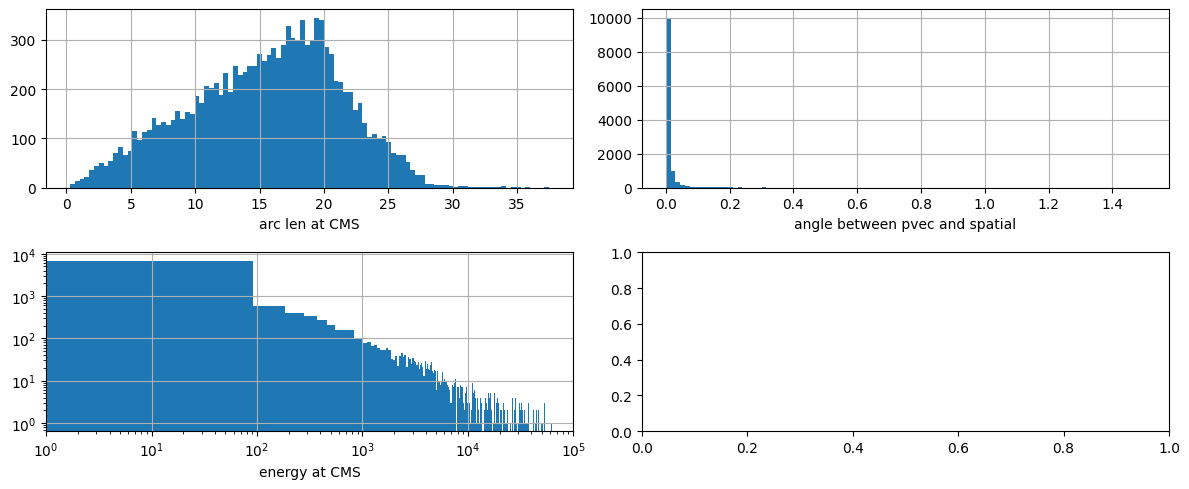

In [77]:
fig, axes = plt.subplots(2, 2, figsize=(12,5))

print(axes)

df_decays['arc_len_at_cms'].hist(bins=100, ax=axes[0][0])
axes[0][0].set_xlabel('arc len at CMS')

df_decays['angle_pvec_spatial'].hist(bins=100, ax=axes[0][1])
axes[0][1].set_xlabel('angle between pvec and spatial')

df_decays['energy_at_cms_mu0'].hist(bins=1000, ax=axes[1][0])
axes[1][0].set_xlabel('energy at CMS')
axes[1][0].set_xscale('log')
axes[1][0].set_yscale('log')
axes[1][0].set_xlim(1,100000)

plt.tight_layout()


[CMS](https://cms.cern/news/detector-overview#:~:text=The%20CMS%20experiment%20is%2021,of%20Geneva%3B%20albeit%20not%20comfortably.&text=The%20detector%20is%20built%20around%20a%20huge%20solenoid%20magnet.)

The CMS experiment is 21 m long, 15 m wide and 15 m high, and sits in a cavern that could contain all the residents of Geneva; albeit not comfortably.



In [117]:
df_decays.columns

Index(['M_DM', 'M_A', 'px_mu1', 'py_mu1', 'pz_mu1', 'e_mu1', 'px_mu2',
       'py_mu2', 'pz_mu2', 'e_mu2', 'pmag1', 'theta1', 'phi1', 'pmag2',
       'theta2', 'phi2', 'opening angle', 'x0', 'y0', 'z0', 'distance_to_cms',
       'energy_at_cms_mu0', 'energy_at_cms_mu1', 'angle_pvec_spatial',
       'arc_len_at_cms'],
      dtype='object')

In [110]:
df_decays['M_A'].unique()

array([0.22, 0.5 , 0.75, 1.  ])

1000   1000   113    0.11
10000   1000   486    0.49
100000   1000   957    0.96


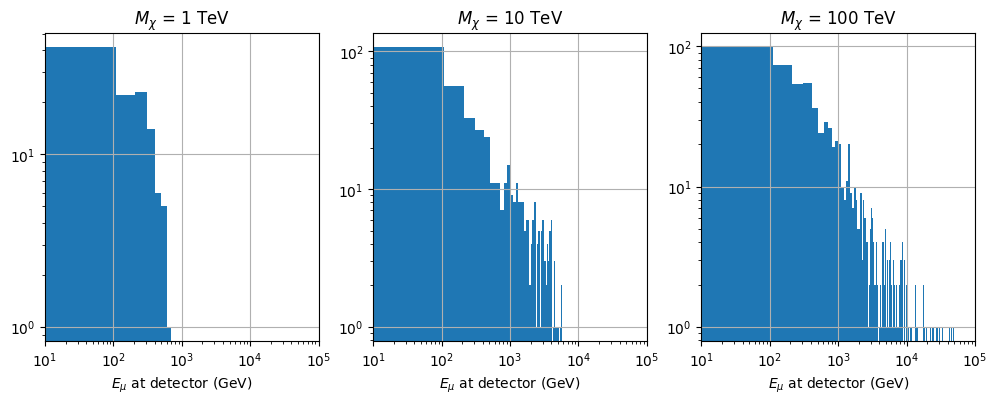

In [129]:
plt.figure(figsize=(12,4))

for i,DM_mass in enumerate([1000, 10000, 100000]):

    PLOT_LOG_X = True
    
    plt.subplot(1,3,i+1)

    nbins = 100
    if PLOT_LOG_X:
        nbins = int(DM_mass/100)
    
    mask = (df_decays['M_DM'] == DM_mass)

    mask = mask & (df_decays['M_A'] == 0.22)
    
    df_decays[mask]['energy_at_cms_mu1'].hist(bins=nbins, range=(10,DM_mass))
    
    E_cutoff = 10

    # Number that make it to the detector
    e = df_decays[mask]['energy_at_cms_mu1']
    n_muons = len(e)
    n_arrive = len(e[e>E_cutoff])
    print(f"{DM_mass}   {n_muons}   {n_arrive}    {n_arrive/n_muons:.2f}")
        
    plt.yscale('log')
    if PLOT_LOG_X:
        plt.xscale('log')

    # Maybe? 
    plt.xlim(10,100000)

    plt.xlabel(r'$E_{\mu}$ at detector (GeV)')

    DM_mass_TeV = int(DM_mass/1000)
    chi_string = '\chi'
    plt.title(f'$M_{chi_string}$ = {DM_mass_TeV:d} TeV')

outfilename = f'muon_energy_at_detector_40m_x_40m_x_6km.png'
plt.savefig(outfilename)

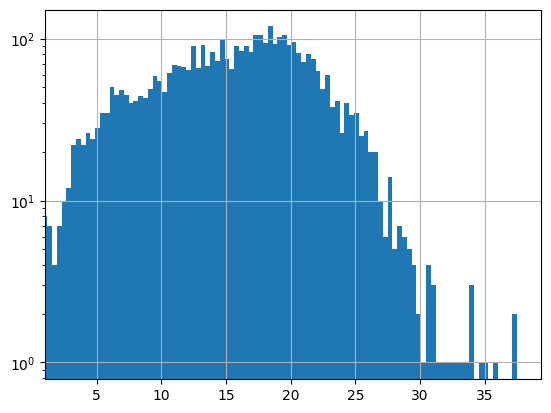

In [119]:
mask = df_decays['M_DM'] == 1000
df_decays[mask]['arc_len_at_cms'].hist(bins=100)

plt.xlim(1)

plt.yscale('log')
#plt.xscale('log')


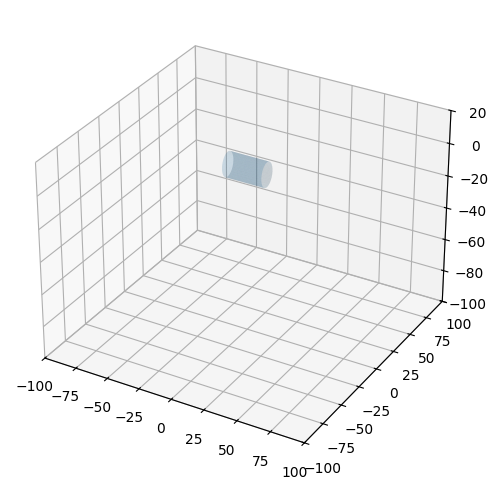

In [120]:
# Size of CMS
# https://cms.cern/news/detector-overview#:~:text=The%20CMS%20experiment%20is%2021,of%20Geneva%3B%20albeit%20not%20comfortably.&text=The%20detector%20is%20built%20around%20a%20huge%20solenoid%20magnet.

# Size of ATLAS
# https://home.cern/science/experiments/atlas#:~:text=At%2046%20m%20long%2C%2025,village%20of%20Meyrin%20in%20Switzerland.

# MOCK DETECTOR
# 30 meters long and 15 in diameter (7.5 in radius)

def draw_CMS():
    # Define CMS
    #origin_CMS = [0, 0, 0]
  
    nmuons = 0
      
    # CMS, units are meters. x is direction of beam and z is up
    #cylinder = Cylinder.from_points([-10.5, 0, 0], [10.5, 0, 0], 7.5)
    # Mock detectors
    cylinder = Cylinder.from_points([-15, 0, 0], [15, 0, 0], 7.5)

    #if MAKE_PLOTS:
    #fig1 = plt.figure(figsize=(6,6))
    #ax1 = fig1.add_subplot(1,1,1,projection='3d')

    fig2 = plt.figure(figsize=(12,6))
    ax2 = fig2.add_subplot(1,1,1,projection='3d')

    #fig3 = plt.figure(figsize=(4,4))
    #ax3 = fig3.add_subplot(1,1,1)

    # Draw CMS
    cylinder.plot_3d(ax2, alpha=0.2)
    ax2.set_xlim(-100,100)
    ax2.set_ylim(-100,100)
    ax2.set_zlim(-100,20)

    return fig2, ax2, cylinder


fig2, ax2, cms = draw_CMS()

In [121]:
mask1 = (df_decays['energy_at_cms_mu0'] > 5) | (df_decays['energy_at_cms_mu1'] > 5)
mask2 = (df_decays['arc_len_at_cms'] < 40)

mask = mask1 & mask2

df_decays[mask]

,M_DM,M_A,px_mu1,py_mu1,pz_mu1,e_mu1,px_mu2,py_mu2,pz_mu2,e_mu2,...,phi2,opening angle,x0,y0,z0,distance_to_cms,energy_at_cms_mu0,energy_at_cms_mu1,angle_pvec_spatial,arc_len_at_cms
2,1000.0,0.22,0.008704,-0.021558,602.788008,602.788018,-0.008704,0.021558,397.211992,397.212007,...,0.000054,0.005563,-15.023069,9.070063,-468.145843,468.474640,54.130178,7.462742,0.037515,17.574795
3,1000.0,0.22,-0.005993,0.025065,589.502122,589.502132,0.005993,-0.025065,410.497879,410.497893,...,-0.000061,0.006102,-1.886466,-8.720369,-534.881702,534.956110,129.043360,10.321206,0.016736,8.952785
5,1000.0,0.22,0.000435,-0.008654,642.063225,642.063234,-0.000435,0.008654,357.936776,357.936791,...,0.000024,0.002160,-7.324297,-3.473067,-570.348719,570.406319,168.392203,0.000000,0.014202,8.101019
9,1000.0,0.22,0.009926,-0.022694,595.166306,595.166316,-0.009926,0.022694,404.833695,404.833709,...,0.000056,0.005890,-2.390858,-9.391928,-150.664761,150.976140,473.810067,283.057907,0.064188,9.690847
11,1000.0,0.22,0.031069,0.000830,542.134858,542.134869,-0.031069,-0.000830,457.865143,457.865156,...,-0.000002,0.007174,-14.441439,1.233035,-704.191100,704.340245,13.827632,0.000000,0.020647,14.542519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,100000.0,1.00,0.232114,0.409815,36913.101873,36913.101876,-0.232114,-0.409815,63086.909640,63086.909642,...,-0.000006,0.001159,-2.624618,-11.679248,-75.918190,76.856132,35599.338136,59790.072659,0.156396,12.020008
11996,100000.0,1.00,-0.204208,-0.382698,72537.293771,72537.293772,0.204208,0.382698,27462.717742,27462.717745,...,0.000014,0.001248,13.307662,8.787012,-1940.177616,1940.243152,13452.875456,6257.753798,0.008233,15.974082
11997,100000.0,1.00,0.294104,-0.386892,55261.990437,55261.990439,-0.294104,0.386892,44738.021076,44738.021079,...,0.000009,0.001126,-6.845134,-15.450308,-2772.663613,2772.715110,550.185878,972.323255,0.006089,16.884340
11998,100000.0,1.00,-0.149983,-0.363110,20912.580872,20912.580876,0.149983,0.363110,79087.430640,79087.430642,...,0.000005,0.001361,-8.490351,-16.459973,-3294.794317,3294.846370,532.479674,1206.023505,0.005616,18.504501


In [122]:
df_decays['M_DM'].unique()

array([  1000.,  10000., 100000.])

In [134]:
for M_DM in [1000, 10000, 100000, 1000000]:
    print("------------------------------------------")
    print(f"M_DM: {M_DM}")
    mask1 = (df_decays['energy_at_cms_mu0'] > 10) | (df_decays['energy_at_cms_mu1'] > 10)
    mask2 = (df_decays['arc_len_at_cms'] < 40)
    
    mask3 = (df_decays['M_DM'] == M_DM)
    mask3 = mask3 & (df_decays['M_A'] == 0.75)

    print(len(mask1))
    print(len(mask1[mask1]))
    print(len(mask2[mask2]))
    print(len(mask3[mask3]))

    n_org = len(df_decays[mask3])
    print(f"# org: {n_org}")
    
    mask = mask1 & mask2 & mask3
    
    print(f'all:       {len(mask)}')
    print(f'mask:      {len(mask[mask])}')
    print(f'm2 and m3: {len(mask[mask3 & mask2])}')
    print(f'm1 and m3: {len(mask[mask3 & mask1])}')

    origins    = np.array([df_decays[mask]['x0'], df_decays[mask]['y0'], df_decays[mask]['z0']]).T
    directions1 = np.array([df_decays[mask]['px_mu1'], df_decays[mask]['py_mu1'], df_decays[mask]['pz_mu1']]).T
    directions2 = np.array([df_decays[mask]['px_mu2'], df_decays[mask]['py_mu2'], df_decays[mask]['pz_mu2']]).T
    
    Pa1, Pb1 = dgt.intersect_finite_cylinder_x_np(origins, directions1)
    Pa2, Pb2 = dgt.intersect_finite_cylinder_x_np(origins, directions2)
        
    # How many hit at each energy
    x = Pa1.T[0]
    n_hit = len(x[x==x])

    n_frac = 0
    if n_org>0:
        n_frac = n_hit/n_org
    
    print(f"# hit: {n_hit}")
    print(f"% hit: {100*n_frac:.2f}%")


------------------------------------------
M_DM: 1000
12000
6799
12000
1000
# org: 1000
all:       12000
mask:      144
m2 and m3: 1000
m1 and m3: 144
# hit: 26
% hit: 2.60%
------------------------------------------
M_DM: 10000
12000
6799
12000
1000
# org: 1000
all:       12000
mask:      593
m2 and m3: 1000
m1 and m3: 593
# hit: 115
% hit: 11.50%
------------------------------------------
M_DM: 100000
12000
6799
12000
1000
# org: 1000
all:       12000
mask:      996
m2 and m3: 1000
m1 and m3: 996
# hit: 195
% hit: 19.50%
------------------------------------------
M_DM: 1000000
12000
6799
12000
0
# org: 0
all:       12000
mask:      0
m2 and m3: 0
m1 and m3: 0
# hit: 0
% hit: 0.00%


In [126]:
def entry_separation(p0, p1):
    dx = p0[0]-p1[0]
    dy = p0[1]-p1[1]
    dz = p0[2]-p1[2]

    dr = np.sqrt(dx**2 + dy**2 + dz**2)

    return dr
    

IndexError: index 0 is out of bounds for axis 0 with size 0

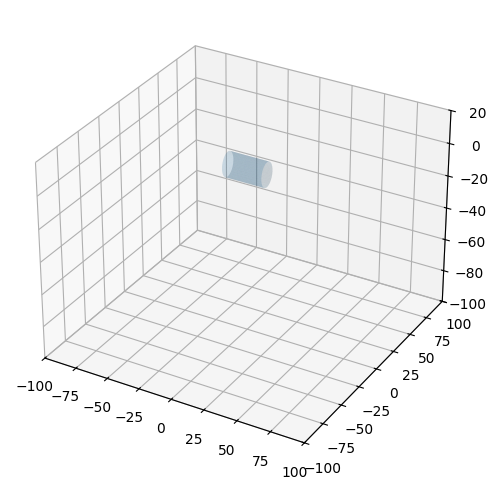

In [127]:
fig2, ax2, cms = draw_CMS()
n = 0

colors = ['k', 'r', 'b', 'g', 'm']


npoints = 0
for n in range(200):

    color = colors[n%len(colors)]
    #print(Pa1[n], Pb1[n])
    if Pa1[n][0] == Pa1[n][0]:
        pa,pb,line = dgt.draw_points(Pa1[n], Pb1[n], ax=ax2, color=color)
        if pa is not None or pb is not None:
            print(Pa1[n], Pb1[n])
            npoints += 1
    pa,pb,line = dgt.draw_points(Pa2[n], Pb2[n], ax=ax2, color=color)
    if pa is not None or pb is not None:
        print(Pa2[n], Pb2[n])
        npoints += 1

ax2.set_xlim(-15, 15)
ax2.set_ylim(-10, 10)
ax2.set_zlim(-10, 10)

ax2.set_xlabel("X axis")
ax2.set_ylabel("Y axis")
ax2.set_zlabel("Z axis")


In [ ]:
d_meters = 500
dgt.energy_loss(10000, material='rock', particle='muon', distance_cm=100*d_meters)

In [ ]:
# Events where the first muon enetered
mask1 = (~np.isnan(Pa1.T[0]))
# Events where the second muon entered
mask2 = (~np.isnan(Pa2.T[0]))

mask = mask1 & mask2

dr = entry_separation(Pa1[mask].T, Pa2[mask].T)

plt.hist(dr, bins=100)


#Pa1.T[0]
;

In [ ]:
# Do a lot

# Do it all maybe?
cms_origin=[0, 0, 0]

data_dict = {}
data_dict['M_DM'] = []
data_dict['xy_limits'] = []
data_dict['depth_limits'] = []
data_dict['frac_detected'] = []

for limits in [10, 20, 30, 40, 50]:
    for depth in [100, 250, 500, 1000, 2500, 5000, 10000, 25000, 50000, 100000]:
        #limits = 200
        #xlo, xhi = -limits,limits
        #ylo, yhi = -limits,limits
        #zlo, zhi = -limits, -1
        xlo, xhi = -limits,limits
        ylo, yhi = -limits,limits
        zlo, zhi = -depth, -1
        
        fill_df_with_origins_distances(df_decays, [xlo,xhi], [ylo,yhi], [zlo,zhi], cms_origin=cms_origin)
        
        energy_after_distance(df_decays, eloss_interp)
        
        angle_between_momentum_and_spatial(df_decays)
        
        for M_DM in [1000, 10000, 100000, 1000000]:
            print("------------------------------------------")
            print(f"M_DM: {M_DM}")
            mask1 = (df_decays['energy_at_cms_mu0'] > 5) | (df_decays['energy_at_cms_mu1'] > 5)
            mask2 = (df_decays['arc_len_at_cms'] < 40)
            mask3 = (df_decays['M_DM'] == M_DM)
        
            #print(len(mask1))
            #print(len(mask1[mask1]))
            #print(len(mask2[mask2]))
            #print(len(mask3[mask3]))
        
            n_org = len(df_decays[mask3])
            print(f"# org: {n_org}")
            
            mask = mask1 & mask2 & mask3
            
            #print(f'all:       {len(mask)}')
            #print(f'mask:      {len(mask[mask])}')
            #print(f'm2 and m3: {len(mask[mask3 & mask2])}')
            #print(f'm1 and m3: {len(mask[mask3 & mask1])}')
        
            origins    = np.array([df_decays[mask]['x0'], df_decays[mask]['y0'], df_decays[mask]['z0']]).T
            directions1 = np.array([df_decays[mask]['px_mu1'], df_decays[mask]['py_mu1'], df_decays[mask]['pz_mu1']]).T
            directions2 = np.array([df_decays[mask]['px_mu2'], df_decays[mask]['py_mu2'], df_decays[mask]['pz_mu2']]).T
            
            Pa1, Pb1 = dgt.intersect_finite_cylinder_x_np(origins, directions1)
            Pa2, Pb2 = dgt.intersect_finite_cylinder_x_np(origins, directions2)
                
            # How many hit at each energy
            x = Pa1.T[0]
            n_hit = len(x[x==x])
            
            n_frac = n_hit/n_org
            
            print(f"# hit: {n_hit}")
            print(f"% hit: {100*n_frac:.2f}%")

            data_dict['M_DM'].append(M_DM)
            data_dict['xy_limits'].append(limits)
            data_dict['depth_limits'].append(depth)
            data_dict['frac_detected'].append(n_frac)

df_acceptance = pd.DataFrame.from_dict(data_dict)


In [ ]:
df_acceptance

In [ ]:
mask = df_acceptance['M_DM']==100000

#sns.histplot(df_acceptance[mask], x='frac_detected', hue='depth_limits')

g = sns.FacetGrid(df_acceptance[mask], col='depth_limits', col_wrap=4, sharex=True, hue='xy_limits')
g.map(sns.histplot, 'frac_detected', bins=10, binrange=(0,1))
plt.legend()

In [ ]:
mask1 = (df_decays['energy_at_cms'] > 5)
mask2 = (df_decays['arc_len_at_cms'] < 20)

mask = mask1 & mask2

#############################################################

cms_origin = [0, 0, 0]

ax2, cms = draw_CMS()
#line.plot_3d(ax2, c='k')

start = time.time()
#origin = [0, 0, -50]
#dir = [0, 0, 40]
n_strike_CMS = 0

strike_CMS = np.zeros(len(df_decays), dtype=int)
df_decays['strike_CMS'] = strike_CMS


df_decays['muon1_CMS_a_x'] = -999*np.ones(len(df_decays), dtype=float)
df_decays['muon1_CMS_a_y'] = -999*np.ones(len(df_decays), dtype=float)
df_decays['muon1_CMS_a_z'] = -999*np.ones(len(df_decays), dtype=float)
df_decays['muon1_CMS_b_x'] = -999*np.ones(len(df_decays), dtype=float)
df_decays['muon1_CMS_b_y'] = -999*np.ones(len(df_decays), dtype=float)
df_decays['muon1_CMS_b_z'] = -999*np.ones(len(df_decays), dtype=float)

df_decays['muon2_CMS_a_x'] = -999*np.ones(len(df_decays), dtype=float)
df_decays['muon2_CMS_a_y'] = -999*np.ones(len(df_decays), dtype=float)
df_decays['muon2_CMS_a_z'] = -999*np.ones(len(df_decays), dtype=float)
df_decays['muon2_CMS_b_x'] = -999*np.ones(len(df_decays), dtype=float)
df_decays['muon2_CMS_b_y'] = -999*np.ones(len(df_decays), dtype=float)
df_decays['muon2_CMS_b_z'] = -999*np.ones(len(df_decays), dtype=float)


print(f"# of muons to try: {len(df_decays[mask])}")

for n in range(len(df_decays[mask])):
    #n = 2
    #if n>10:
    #    break
    
    x0 = df_decays[mask]['x0'].values[n]
    y0 = df_decays[mask]['y0'].values[n]
    z0 = df_decays[mask]['z0'].values[n]

    origin= [x0, y0, z0]

    for muon_idx in ['1', '2']:
        px = df_decays[mask][f'px_mu{muon_idx}'].values[n]
        py = df_decays[mask][f'py_mu{muon_idx}'].values[n]
        pz = df_decays[mask][f'pz_mu{muon_idx}'].values[n]
    
        distance = df_decays[mask]['distance_to_cms'].values[n]
        
        #print(df_decays[mask].iloc[n])
        
        dir = 100*np.array([px, py, pz])
        
        # Is this how we draw the lines correctly?
        m = dgt.mag(dir)
        dir /= m
        dir *= distance
        
        #print(f"origin: {origin}")
        #print(f"dir:    {dir}")
        
        line = Line(point=origin, direction=dir)
        #line.plot_3d(ax2, c='k')
    
        idx = df_decays[mask].index[n]
        
        point_a,point_b = None, None
        try:
            point_a, point_b = cms.intersect_line(line, infinite=False)
            #line.plot_3d(ax2, c='k')
        except ValueError:
            1
        #print(point_a)
        #print(point_b)
        
        if point_b is not None:
            1
            #point_b.plot_3d(ax2, c='g',s=10)
            #print(f"point_b: {point_b}")    
            df_decays.loc[idx, 'strike_CMS'] = 1
            df_decays.loc[idx, f'muon{muon_idx}_CMS_b_x'] = point_b[0]
            df_decays.loc[idx, f'muon{muon_idx}_CMS_b_y'] = point_b[1]
            df_decays.loc[idx, f'muon{muon_idx}_CMS_b_z'] = point_b[2]

        if point_a is not None:
            1
            #point_a.plot_3d(ax2, c='g',s=10)
            #print(f"point_a: {point_a}")    
            df_decays.loc[idx, 'strike_CMS'] = 1
            df_decays.loc[idx, f'muon{muon_idx}_CMS_a_x'] = point_a[0]
            df_decays.loc[idx, f'muon{muon_idx}_CMS_a_y'] = point_a[1]
            df_decays.loc[idx, f'muon{muon_idx}_CMS_a_z'] = point_a[2]
    
        if point_a is not None or point_b is not None:
            n_strike_CMS += 1
            print(f"{n:2d}  {n_strike_CMS:4d}  {idx}      {time.time() - start:6.2f} seconds")
            df_decays.loc[idx, 'strike_CMS'] = 1


print(f"Time to run: {time.time() - start} seconds")
print(f"# strike CMS: {n_strike_CMS}")

In [ ]:
#df_decays.to_parquet('HIGH_MASS_DECAYS.parquet')

In [ ]:
mask = df_decays['muon1_CMS_a_x'] > -100
df_decays[mask]

In [ ]:
# About 5 minutes to run over 900 muons and about 250 strike CMS

In [ ]:
print(len(df_decays))

In [ ]:
#df_decays.loc[18656, 'strike_CMS'] = 1
#df_decays.iloc[18656]

In [ ]:
mask = df_decays['strike_CMS'] == 1

df_decays[mask]

In [ ]:
mask = df_decays['strike_CMS'] == 1

df_decays[mask]['energy_at_cms'].hist(bins=100)

plt.xscale('log')

# Timing tests of spatial

In [ ]:
nlines = 30

cms_origin = [0, 0, 0]
cms = Cylinder.from_points([-10.5, 0, 8], [10.5, 0, 8], 7.5)

start = time.time()

for i in range(nlines):
    origin = 10-20*np.random.random(3)
    dir = 10-20*np.random.random(3)
    line = Line(point=origin, direction=dir)
    point_a,point_b = None, None
    try:
        point_a, point_b = cms.intersect_line(line, infinite=False)
    except ValueError:
        1

print(f"Time to run over {nlines} nlines: {time.time() - start:.2f} seconds")

In [ ]:
#cms.to_mesh()

In [ ]:
from skspatial.objects import Circle
from skspatial.objects import Line
from skspatial.plotting import plot_2d


circle = Circle([0, 0], 5)
line = Line([0, 0], [1, 1])

point_a, point_b = circle.intersect_line(line)


_, ax = plot_2d(
    circle.plotter(fill=False),
    line.plotter(t_1=-5, t_2=5, c='k'),
    point_a.plotter(c='r', s=100, edgecolor='k', zorder=3),
    point_b.plotter(c='r', s=100, edgecolor='k', zorder=3),
)

ax.axis('equal')

In [ ]:
# Does this AI work?

import numpy as np

def line_cylinder_intersection(cylinder_center, cylinder_radius, cylinder_axis, line_point, line_direction):
    """
    Calculates the intersection points of a line and a cylinder.

    Args:
        cylinder_center (np.ndarray): Center of the cylinder (3D coordinates).
        cylinder_radius (float): Radius of the cylinder.
        cylinder_axis (np.ndarray): Axis direction of the cylinder (normalized).
        line_point (np.ndarray): A point on the line (3D coordinates).
        line_direction (np.ndarray): Direction vector of the line (normalized).

    Returns:
        list: A list of intersection points (np.ndarray) if they exist, otherwise an empty list.
    """

    # Normalize vectors
    cylinder_axis = cylinder_axis / np.linalg.norm(cylinder_axis)
    line_direction = line_direction / np.linalg.norm(line_direction)

    # Project line direction onto plane perpendicular to cylinder axis
    line_direction_proj = line_direction - np.dot(line_direction, cylinder_axis) * cylinder_axis
    if np.allclose(line_direction_proj, 0):
      return [] # Line is parallel to cylinder axis

    line_direction_proj = line_direction_proj / np.linalg.norm(line_direction_proj)

    # Vector from cylinder center to line point
    center_to_line = line_point - cylinder_center

    # Project center_to_line onto the same plane
    center_to_line_proj = center_to_line - np.dot(center_to_line, cylinder_axis) * cylinder_axis

    # Quadratic equation coefficients
    a = np.dot(line_direction_proj, line_direction_proj)
    b = 2 * np.dot(line_direction_proj, center_to_line_proj)
    c = np.dot(center_to_line_proj, center_to_line_proj) - cylinder_radius**2

    # Solve quadratic equation
    delta = b**2 - 4 * a * c
    if delta < 0:
        return []  # No intersection
    t1 = (-b + np.sqrt(delta)) / (2 * a)
    t2 = (-b - np.sqrt(delta)) / (2 * a)

    p1,p2 = None, None
    # Calculate intersection points
    p1 = line_point + t1 * line_direction
    p2 = line_point + t2 * line_direction

    return [p1, p2]

# Example Usage
cylinder_center = np.array([0, 0, 0])
cylinder_radius = 1
cylinder_axis = np.array([0, 0, 1])
line_point = np.array([0, -2, 0])
line_direction = np.array([0, 1, 0])

intersection_points = line_cylinder_intersection(cylinder_center, cylinder_radius, cylinder_axis, line_point, line_direction)

if intersection_points:
    print("Intersection points:")
    for point in intersection_points:
        print(point)
else:
    print("No intersection")

In [ ]:
# ChatGPT

import math

def intersect_cylinder_x_pts(origin, direction, radius=7.5, eps=1e-12):
    """
    Intersect a line P(t) = origin + t*direction with the infinite cylinder
    y^2 + z^2 = radius^2 (axis along x).  Return two 3D points (or None).

    Parameters
    ----------
    origin : sequence of 3 floats
        (Ox, Oy, Oz)
    direction : sequence of 3 floats
        (Dx, Dy, Dz)
    radius : float
        Cylinder radius (default 7.5)
    eps : float
        Small threshold to detect axis‐parallel lines

    Returns
    -------
    (pt0, pt1) : tuple
        Each is either a 3‐tuple (x, y, z) or None:
        - (None, None) if no intersection
        - (P, None) if tangent (one hit)
        - (P0, P1) for two distinct intersection points
    """
    Ox, Oy, Oz = origin
    Dx, Dy, Dz = direction

    # Quadratic coefficients for (Oy + t*Dy)^2 + (Oz + t*Dz)^2 = radius^2
    a = Dy*Dy + Dz*Dz
    if abs(a) < eps:
        # Ray is parallel to cylinder axis → no side intersections
        return None, None

    b = 2.0 * (Oy*Dy + Oz*Dz)
    c = Oy*Oy + Oz*Oz - radius*radius

    disc = b*b - 4.0*a*c
    if disc < 0.0:
        return None, None

    sqrt_disc = math.sqrt(disc)
    inv2a = 0.5 / a
    t0 = (-b - sqrt_disc) * inv2a
    t1 = (-b + sqrt_disc) * inv2a

    # helper to build the 3D point
    def make_pt(t):
        return (Ox + t*Dx, Oy + t*Dy, Oz + t*Dz)

    if disc == 0.0:
        # tangent
        return make_pt(t0), None

    # two intersections; sort by t if you like
    if t0 <= t1:
        return make_pt(t0), make_pt(t1)
    else:
        return make_pt(t1), make_pt(t0)


In [ ]:
import numpy as np

def intersect_finite_cylinder_x_np(origins, directions,
                                   radius=7.5, half_len=10.5, eps=1e-12):
    """
    Vectorized intersection of N rays with a finite cylinder along the x-axis.
    
    Parameters
    ----------
    origins : (N,3) array_like
        Ray start points.
    directions : (N,3) array_like
        Ray direction vectors.
    radius : float
        Cylinder radius.
    half_len : float
        Half the length of the cylinder along x (so x ∈ [-half_len, +half_len]).
    eps : float
        Threshold for treating a coefficient as zero.
    
    Returns
    -------
    pts0, pts1 : each an (N,3) array
        The first and second intersection points.  If a ray has
        <1 intersection, that row is NaN; if exactly 1, pts1 is NaN.
    """
    O = np.asarray(origins, dtype=float)
    D = np.asarray(directions, dtype=float)
    Ox, Oy, Oz = O[:,0], O[:,1], O[:,2]
    Dx, Dy, Dz = D[:,0], D[:,1], D[:,2]
    N = len(O)

    # --- barrel (side) intersections ---
    a = Dy**2 + Dz**2
    b = 2*(Oy*Dy + Oz*Dz)
    c = Oy**2 + Oz**2 - radius**2

    disc = b*b - 4*a*c
    real = (disc >= 0) & (a > eps)
    sqrt_disc = np.sqrt(np.clip(disc, 0, None))
    inv2a   = 0.5 / np.where(a>eps, a, 1.0)    # avoid div0

    # two roots
    t_barrel0 = (-b - sqrt_disc) * inv2a
    t_barrel1 = (-b + sqrt_disc) * inv2a

    # keep only those within x‐slab
    x0 = Ox + t_barrel0*Dx
    x1 = Ox + t_barrel1*Dx
    ok0 = real & (x0 >= -half_len) & (x0 <= half_len)
    ok1 = real & (x1 >= -half_len) & (x1 <= half_len)

    # --- cap intersections ---
    # avoid division by zero
    nonpara = np.abs(Dx) > eps
    t_cap_pos = np.where(nonpara, ( half_len - Ox)/Dx, np.nan)
    t_cap_neg = np.where(nonpara, (-half_len - Ox)/Dx, np.nan)

    # check disk‐inclusion
    y_pos = Oy + t_cap_pos*Dy
    z_pos = Oz + t_cap_pos*Dz
    y_neg = Oy + t_cap_neg*Dy
    z_neg = Oz + t_cap_neg*Dz

    ok_pos = nonpara & (y_pos*y_pos + z_pos*z_pos <= radius*radius)
    ok_neg = nonpara & (y_neg*y_neg + z_neg*z_neg <= radius*radius)

    # --- stack all candidates ---
    # shape (N,4)
    t_cand = np.stack([t_barrel0, t_barrel1, t_cap_pos, t_cap_neg], axis=1)
    valid  = np.stack([ok0,        ok1,        ok_pos,    ok_neg],   axis=1)

    # mask out invalids to NaN (so they sort to the end)
    t_cand = np.where(valid, t_cand, np.nan)

    # --- pick the two smallest t values per ray ---
    order = np.argsort(t_cand, axis=1)           # NaNs go last
    idx0  = order[:, 0]
    idx1  = order[:, 1]

    # gather t0, t1
    t0 = t_cand[np.arange(N), idx0]
    t1 = t_cand[np.arange(N), idx1]

    # --- recover 3D points; NaNs propagate automatically ---
    P0 = O + t0[:,None] * D
    P1 = O + t1[:,None] * D

    return P0, P1


In [ ]:
import math

def intersect_finite_cylinder_x(origin, direction,
                                radius=7.5, half_len=10.5, eps=1e-12):
    """
    Intersect the line P(t)=O + t*D with the finite cylinder
      x in [-half_len, +half_len],  y^2+z^2 = radius^2.
    Returns up to two 3D intersection points (or None).
    """
    Ox, Oy, Oz = origin
    Dx, Dy, Dz = direction
    hits = []

    # --- 1) barrel intersections ---
    a = Dy*Dy + Dz*Dz
    if abs(a) > eps:
        b = 2*(Oy*Dy + Oz*Dz)
        c = Oy*Oy + Oz*Oz - radius*radius
        disc = b*b - 4*a*c
        if disc >= 0:
            sqrt_d = math.sqrt(disc)
            inv2a = 0.5 / a
            for q in (-1, +1):
                t = (-b + q*sqrt_d) * inv2a
                x = Ox + t*Dx
                if -half_len <= x <= half_len:
                    hits.append((t, (x,
                                     Oy + t*Dy,
                                     Oz + t*Dz)))

    # --- 2) cap intersections ---
    if abs(Dx) > eps:
        for x_cap in (+half_len, -half_len):
            t = (x_cap - Ox)/Dx
            y = Oy + t*Dy
            z = Oz + t*Dz
            if y*y + z*z <= radius*radius:
                hits.append((t, (x_cap, y, z)))

    if not hits:
        return None, None

    # --- 3) sort by t, take up to two ---
    hits.sort(key=lambda hit: hit[0])
    pts = [hit[1] for hit in hits[:2]]
    # pad with None if only one
    if len(pts) == 1:
        pts.append(None)
    return tuple(pts)


In [ ]:
import numpy as np

def line_disk_intersection(p0, v, c, n, r):
    """
    Calculates the intersection point of a line and a disk in 3D.

    Args:
        p0: numpy array, point on the line
        v: numpy array, direction vector of the line
        c: numpy array, center of the disk
        n: numpy array, normal vector of the disk
        r: float, radius of the disk

    Returns:
        numpy array, intersection point if it exists and is within the disk, otherwise None
    """
    v = v / np.linalg.norm(v)  # Normalize direction vector

    dot_vn = np.dot(v, n)
    if abs(dot_vn) < 1e-6:  # Line is parallel to the plane
        return None

    t = np.dot(c - p0, n) / dot_vn
    p_intersect = p0 + t * v

    distance = np.linalg.norm(p_intersect - c)
    if distance <= r:
        return p_intersect
    else:
        return None

# Example usage
p0 = np.array([0, 0, 0])  # Point on the line
v = np.array([1, 1, 1])  # Direction vector of the line
c = np.array([2, 2, 2])  # Center of the disk
n = np.array([1, 1, 1])  # Normal vector of the disk
n = n / np.linalg.norm(n)  # Normalize normal vector
r = 1  # Radius of the disk

intersection_point = line_disk_intersection(p0, v, c, n, r)

if intersection_point is not None:
    print("Intersection point:", intersection_point)
else:
    print("No intersection")

In [ ]:
#cms_origin = [0, 0, 0]
#cms = Cylinder.from_points([-10.5, 0, 8], [10.5, 0, 8], 7.5)
cms = Cylinder.from_points([-10.5, 0, 0], [10.5, 0, 0], 7.5)

#cylinder_center = np.array([0, 0, 8])
cylinder_center = np.array([0, 0, 0])
cylinder_radius = 7.5
cylinder_axis = np.array([1, 0, 0])


c1 = np.array([-10.5, 0, 0])  # Center of the disk
n1 = np.array([1, 0, 0])  # Normal vector of the disk
n1 = n1 / np.linalg.norm(n1)  # Normalize normal vector
r1 = 7.5  # Radius of the disk

c2 = np.array([10.5, 0, 0])  # Center of the disk
n2 = np.array([1, 0, 0])  # Normal vector of the disk
n2 = n2 / np.linalg.norm(n2)  # Normalize normal vector
r2 = 7.5  # Radius of the disk

nlines = 10000

start = time.time()

for i in range(nlines):
    
    line_point =     [10-20*np.random.random(), 10-20*np.random.random(), -10 -20*np.random.random()]
    line_direction = [10-20*np.random.random(), 10-20*np.random.random(), 20*np.random.random()]

    # Google AI
    #intersection_points = line_cylinder_intersection(cylinder_center, cylinder_radius, cylinder_axis, line_point, line_direction)
    # ChatGPT
    #intersection_points = intersect_cylinder_x_pts(line_point, line_direction, radius=7.5, eps=1e-12)
    intersection_points_2 = intersect_finite_cylinder_x(line_point, line_direction, radius=7.5, half_len=10.5, eps=1e-12)


    #intersection_point_disc_1 = line_disk_intersection(line_point, line_direction, c1, n1, r1)
    #intersection_point_disc_2 = line_disk_intersection(line_point, line_direction, c2, n2, r2)

    '''
    print("TESTING -----------------------------------------------")
    if intersection_points:
        print(f"line: {line_point}    {line_direction}")
        print("Intersection points: --------------------")
        for point in intersection_points:
            print(point)
    else:
        print("No intersection")

    '''
    print("Part 2 -----------")
    print(intersection_points_2)
    '''
    if intersection_point_disc_1 is not None:
        print("Intersection point disc 1:", intersection_point_disc_1)
    if intersection_point_disc_2 is not None:
        print("Intersection point disc 2:", intersection_point_disc_2)
    '''

    # Skspatial
    '''
    line = Line(point=line_point, direction=line_direction)
    
    point_a,point_b = None, None
    try:
        point_a, point_b = cms.intersect_line(line, infinite=True)
    except ValueError:
        1
    if point_a is not None or point_b is not None:
        print("Skspatial -------- infinite")
        if 1:#point_a[0]<10.5 and point_a[0]>-10.5:
            print(point_a)
        if 1:#point_b[0]<10.5 and point_b[0]>-10.5:
            print(point_b)

    point_a,point_b = None, None
    try:
        point_a, point_b = cms.intersect_line(line, infinite=False)
    except ValueError:
        1
    if point_a is not None or point_b is not None:
        print("Skspatial -------- finite")
        if 1:#point_a[0]<10.5 and point_a[0]>-10.5:
            print(point_a)
        if 1:#point_b[0]<10.5 and point_b[0]>-10.5:
            print(point_b)

    '''

print(f"Time to run over {nlines} nlines: {time.time() - start:.2f} seconds")

In [ ]:
# Numpy version
import numpy as np

# Suppose we have N rays:
N = 1000
origins    = np.random.uniform(-20, 20, size=(N,3))
directions = np.random.normal(size=(N,3))

P0, P1 = intersect_finite_cylinder_x_np(origins, directions)
# P0[i] is the first hit of ray i (or [nan,nan,nan]),
# P1[i] is the second hit (or nan if none).

#print(P0, P1)
for a,b in zip(P0, P1):
    if a[0]==a[0] or b[0]==b[0]:
        print(a,b)

In [ ]:
n = 0
intersection_points_2 = intersect_finite_cylinder_x(origins[n], directions[n], radius=7.5, half_len=10.5, eps=1e-12)

print(intersection_points_2)

In [ ]:
def draw_points(point_a, point_b, ax=plt.gca(), color='r'):

    pa,pb,line = None, None, None
    if point_a[0]==point_a[0]:
        pa = Point(point_a)
        pa.plot_3d(ax, s=75, c=color)
    
    if point_b[0]==point_b[0]:
        pb = Point(point_b)
        pb.plot_3d(ax, s=75, c=color)

    if point_b[0]==point_b[0] and point_a[0]==point_a[0]:
        #line = Line(point_a, point_b)
        line = Line(pa, pb-pa)

        line.plot_3d(ax2, c=color)
    
    return pa,pb,line


In [ ]:
ax2, cms = draw_CMS()
n = 0

colors = ['k', 'r', 'b', 'g', 'm']


npoints = 0
for n in range(50):

    color = colors[n%len(colors)]
    pa,pb,line = draw_points(P0[n], P1[n], ax=ax2, color=color)
    if pa is not None or pb is not None:
        print(P0[n], P1[n])
        npoints += 1

ax2.set_xlim(-15, 15)
ax2.set_ylim(-10, 10)
ax2.set_zlim(-10, 10)